In [1]:
# coding: utf-8
import time
import pandas as pd
import numpy as np
import sklearn.datasets
import tensorflow as tf
import matplotlib.pyplot as plt
import sklearn.model_selection as sk
from keras.utils.np_utils import to_categorical

Using TensorFlow backend.


In [2]:
def prepare_data(data_size=50000):
    # Read make moon data
    X, y = sklearn.datasets.make_moons(n_samples=data_size, shuffle=True, noise=0.1, random_state=None)
    
    # Split datasets to 80%-training / 20%-testing
    X_train, X_test, y_train, y_test = sk.train_test_split(X, y, test_size=0.2)
    
    # One-hot Encoding
    y_train = to_categorical(y_train, num_classes=2)
    y_test = to_categorical(y_test, num_classes=2)
    
    return X_train, X_test, y_train, y_test

In [9]:
def logistic_regression():
    tf.reset_default_graph()

    X_train, X_test, y_train, y_test = prepare_data(50000)
    
    # Parameters
    epoch = 20
    batch_size = 500
    learning_rate = 0.3
    nums_example = X_train.shape[0]
    total_batch = int(nums_example / batch_size)

    with tf.name_scope('input'):
        x = tf.placeholder('float', [None, 2], name='input_x')
        y = tf.placeholder('float', [None, 2], name='label_y')

    with tf.name_scope('weight'):
        W = tf.Variable(tf.truncated_normal([2, 2], stddev=0.1), name="W")

    with tf.name_scope('bias'):
        b = tf.Variable(tf.constant(0.1, shape=[1, 2]), name="b")

    with tf.name_scope('Wx_plus_b'):
        y_hat = tf.nn.sigmoid(tf.matmul(x, W) + b)

    with tf.name_scope('loss'):
        loss_function = tf.reduce_mean(-tf.reduce_sum(y * tf.log(y_hat), reduction_indices=1))
    tf.summary.scalar('loss', loss_function)

    with tf.name_scope('train'):
        optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(loss_function)

    with tf.name_scope('accuracy'):
        correct_prediction = tf.equal(tf.argmax(y_hat, 1), tf.argmax(y, 1))
        accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
    tf.summary.scalar('accuracy', accuracy)
    
    iteration = 0
    sess = tf.Session()
    sess.as_default()
    merged = tf.summary.merge_all()
    writer = tf.summary.FileWriter("2_logs/", sess.graph)
    sess.run(tf.global_variables_initializer())
    saver = tf.train.Saver()

    train_acc_list = []
    test_acc_list = []

    # try:
    for e in range(epoch):
        avg_cost = 0.
        avg_acc = 0.

        for i in range(total_batch):
            batch_xs, batch_ys = X_train[i*batch_size:i*batch_size+batch_size,:],\
                                    y_train[i*batch_size:i*batch_size+batch_size,:]

#             sess.run(optimizer, feed_dict={x: batch_xs, y: batch_ys})
            _, c = sess.run([optimizer, loss_function], feed_dict={x: batch_xs, y: batch_ys})
            avg_cost += c / total_batch

            if iteration % 50 == 0:
                result = sess.run(merged, feed_dict={x: batch_xs, y: batch_ys})

#                 summary_str = loss_function.eval(feed_dict={x: batch_xs, y: batch_ys}, session=sess)
#                 result = sess.run(merged, feed_dict={x: batch_xs, y: batch_ys})
                writer.add_summary(result, iteration)

    #     file_name = 'regular_training_epoch_%d.ckpt' % (i+1)
    #     save_path = saver.save(sess, "regular_train/" + file_name)
    #     print("Model saved in path: %s" % save_path)

        train_acc = sess.run(accuracy, feed_dict={x: X_train, y: y_train})
        test_acc = sess.run(accuracy, feed_dict={x: X_test, y: y_test})

        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)

        print("Epoch: %04d, loss = %.9f, train_acc = %.4f" % ((e+1), avg_cost, train_acc))
        print("Epoch: %04d, loss = %.9f, test_acc = %.4f" % ((e+1), avg_cost, test_acc))
        print("-")

    # except:
    #     print('An error occurs!')
    #     now_time = int(time.time())
    #     file_name = '%d.ckpt' % now_time
    #     save_path = saver.save(sess, "interrupted_train/" + file_name)
    #     print("Model saved in path: %s" % save_path)

    print("Done!")

In [11]:
logistic_regression()

Epoch: 0001, loss = 0.176353730, train_acc = 0.8086
Epoch: 0001, loss = 0.176353730, test_acc = 0.8063
-
Epoch: 0002, loss = 0.046398028, train_acc = 0.8122
Epoch: 0002, loss = 0.046398028, test_acc = 0.8108
-
Epoch: 0003, loss = 0.028061946, train_acc = 0.8138
Epoch: 0003, loss = 0.028061946, test_acc = 0.8123
-
Epoch: 0004, loss = 0.020236267, train_acc = 0.8147
Epoch: 0004, loss = 0.020236267, test_acc = 0.8134
-
Epoch: 0005, loss = 0.015858054, train_acc = 0.8156
Epoch: 0005, loss = 0.015858054, test_acc = 0.8139
-
Epoch: 0006, loss = 0.013051652, train_acc = 0.8163
Epoch: 0006, loss = 0.013051652, test_acc = 0.8139
-
Epoch: 0007, loss = 0.011096467, train_acc = 0.8168
Epoch: 0007, loss = 0.011096467, test_acc = 0.8140
-
Epoch: 0008, loss = 0.009654956, train_acc = 0.8170
Epoch: 0008, loss = 0.009654956, test_acc = 0.8144
-
Epoch: 0009, loss = 0.008547570, train_acc = 0.8172
Epoch: 0009, loss = 0.008547570, test_acc = 0.8145
-
Epoch: 0010, loss = 0.007669855, train_acc = 0.8173
Epo

In [7]:
def show_train_history(training, testing):
    max_acc = max(testing)
    index = testing.index(max_acc)
    annotate = 'max_test_acc = %.4f at epoch %d' % (max_acc, index + 1)
    plt.plot(training)
    plt.plot(testing)
#     plt.annotate(annotate, xy=(index, max_acc), xytext=(index, max_acc + 0.005), arrowprops=dict(facecolor='black', shrink=0.01))
    plt.title('Train History')
    plt.xlabel('Epoch')
    plt.ylabel('Acc')
    plt.legend(['Training', 'Testing'], loc='upper left')
    plt.show()

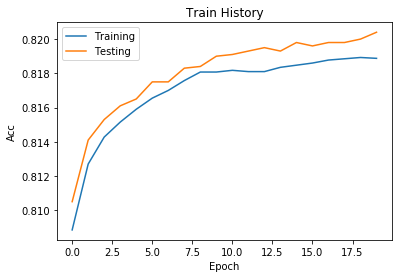

In [8]:
show_train_history(train_acc_list, test_acc_list)

In [9]:
def plot_datasets(X, y):
    df = pd.DataFrame(dict(x=X[:,0], y=X[:,1], label=y))
    colors = plot_datasets{0:'red', 1:'blue'}
    fig, ax = plt.subplots()
    grouped = df.groupby('label')
    for key, group in grouped:
        group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=colors[key])
    plt.show()